## Importing libraries....

In [20]:
# importing libraries....
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In this notebook we're going to predict the prize of the Bitcoin💰.
We'll build a series of model for prediction.

What we're going to cover....???
    ~ Get the data
    ~ Format the data
    ~ Visualize the data
    ~ Prepare data into window size
    ~ Setup a series of model
    ~ Make Prdiction

In [4]:
# getting the data...
!ls

btc_data.csv         btc_prediction.ipynb


In [14]:
df = pd.read_csv("btc_data.csv",parse_dates=["Date"],index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [15]:
# get some data info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [16]:
df.shape

(2787, 5)

In [18]:
# get the btc price for each day
btc_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
btc_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


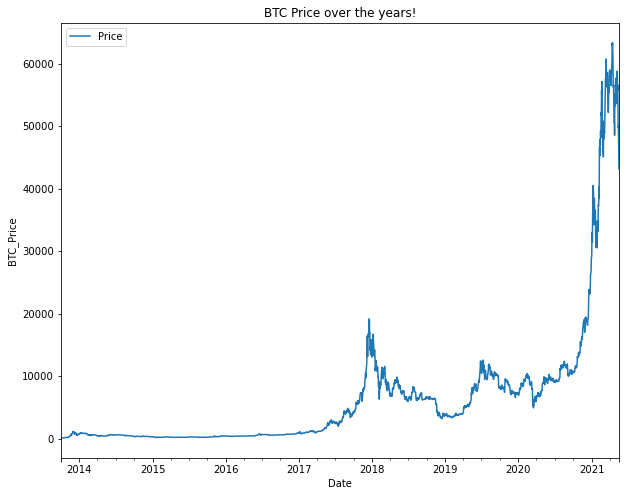

In [21]:
# let's visualize the data...
btc_prices.plot(figsize=(10,8))
plt.ylabel("BTC_Price")
plt.title("BTC Price over the years!")
plt.show()

## Format the data for training and testing...

In [23]:
prices = btc_prices["Price"].to_numpy()
timestamps = btc_prices.index.to_numpy()

In [24]:
# create train and test split 80% for training and 20% testing.....
split_size = int(0.8 * len(btc_prices))

# create train data splits...
X_train,y_train = timestamps[:split_size],prices[:split_size]

# create test data split....
X_test,y_test = timestamps[split_size:],prices[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

In [30]:
# let's make a plotting function
def plot_time_series(timestamps,value,format=".",start=0,end=None,label=None):
    plt.plot(timestamps[start:end],value[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    if label:
        plt.legend(fontsize=10)
    plt.grid(True)

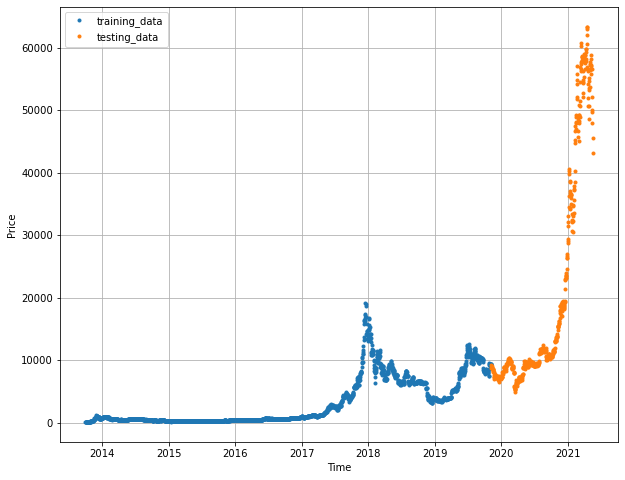

In [31]:
plt.figure(figsize=(10,8))
plot_time_series(X_train,y_train,label="training_data")
plot_time_series(X_test,y_test,label="testing_data")